# Boston House Price 

object:Prediction of Boston house prices

We will perform the following steps:

1- Load the Dataset (Import libraries and load dataset)
2- Analyze Data (Descriptive Statistics)
3- Data Visualizations (Unimodal and Multimodal, Summary of Ideas)
4- Validation Dataset
5- Evaluate Algorithms: Baseline
6- Evaluate Algorithms: Standardization
7- Improve Results with Tuning
8- Ensemble Methods
9- Tune Ensemble Methods
10- Finalize Model
11- Summary
12- References

1- CRIM: per capita crime rate by town
,taux de criminalité par habitant par ville,معدل الجريمة للفرد حسب المدينة

2- ZN: proportion of residential land zoned for lots over 25,000 sq.ft
proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés
نسبة الأراضي السكنية المخصصة للقطع التي تزيد مساحتها عن 25000 قدم مربع

3- INDUS: proportion of non-retail business acres per town
نسبة فدان الأعمال غير التجزئة لكل مدينة
proportion de superficies commerciales non commerciales par ville

4- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
Variable muette de Charles River (= 1 si le tronçon délimite la rivière ; 0 sinon)
المتغير الوهمي لنهر تشارلز (= 1 إذا كانت المسالك تحد النهر؛ 0 بخلاف ذلك)

5- NOX: nitric oxides concentration (parts per 10 million)
Concentration d'oxyde nitrique (parties pour 10 millions)
تركيز أكاسيد النيتريك (أجزاء لكل 10 مليون)

6- RM: average number of rooms per dwelling
nombre moyen de pièces par logement
متوسط عدد الغرف لكل مسكن

7- AGE: proportion of owner-occupied units built prior to 1940
proportion de logements occupés par leur propriétaire construits avant 1940
نسبة الوحدات التي يشغلها المالك والتي تم بناؤها قبل عام 1940

8- DIS: weighted distances to ve Boston employment centers
distances pondérées par rapport aux cinq centres d'emploi de Boston
المسافات الموزونة إلى مراكز التوظيف في بوسطن

9- RAD: index of accessibility to radial highways
مؤشر إمكانية الوصول إلى الطرق السريعة الشعاعية
indice d'accessibilité aux autoroutes radiales

10- TAX: full-value property-tax rate per USD 10,
taux de taxe foncière sur la valeur totale par tranche de 10 USD,
معدل ضريبة الأملاك ذات القيمة الكاملة لكل 10 دولارات أمريكية،

11-  PTRATIO: pupil-teacher ratio by town
نسبة التلاميذ / المعلمين حسب المدينة
ratio élèves/enseignant par ville

12- B: 1000(Bk - 0:63)^2 where Bk is the proportion of blacks by town
1000(Bk - 0:63)^2 où Bk est la proportion de noirs par ville
1000(Bk - 0:63)^2 حيث Bk هي نسبة السود حسب المدينة

13- LSTAT: % lower status of the population
٪ انخفاض وضع السكان
% statut inférieur de la population

14- MEDV: Median value of owner-occupied homes in USD 1000s
Valeur médiane des logements occupés par leur propriétaire en milliers de dollars
القيمة المتوسطة للمنازل التي يشغلها مالكوها بآلاف الدولارات الأمريكية


In [42]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [43]:

dataset=read_csv('boston.csv')


In [44]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [45]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [47]:
dataset.select_dtypes(include=['object', 'category']).columns

Index([], dtype='object')

In [48]:
#2.	Afficher les dimensions du DataFrame.
dataset.shape

(506, 14)

In [49]:
dataset.select_dtypes(exclude=['object', 'category']).columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [50]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [51]:

#chas est categorienne 0,1
for column in dataset:
    print(column)
    print(round(dataset[column].value_counts()/len(dataset),2))

CRIM
0.01501     0.0
14.33370    0.0
0.03466     0.0
0.03113     0.0
0.03049     0.0
           ... 
1.51902     0.0
1.83377     0.0
1.46336     0.0
1.27346     0.0
0.04741     0.0
Name: CRIM, Length: 504, dtype: float64
ZN
0.0      0.74
20.0     0.04
80.0     0.03
22.0     0.02
12.5     0.02
25.0     0.02
40.0     0.01
45.0     0.01
30.0     0.01
90.0     0.01
95.0     0.01
60.0     0.01
21.0     0.01
33.0     0.01
55.0     0.01
70.0     0.01
34.0     0.01
52.5     0.01
35.0     0.01
28.0     0.01
75.0     0.01
82.5     0.00
85.0     0.00
17.5     0.00
100.0    0.00
18.0     0.00
Name: ZN, dtype: float64
INDUS
18.10    0.26
19.58    0.06
8.14     0.04
6.20     0.04
21.89    0.03
         ... 
1.21     0.00
1.38     0.00
3.75     0.00
0.46     0.00
2.31     0.00
Name: INDUS, Length: 76, dtype: float64
CHAS
0    0.93
1    0.07
Name: CHAS, dtype: float64
NOX
0.538    0.05
0.713    0.04
0.437    0.03
0.871    0.03
0.624    0.03
         ... 
0.394    0.00
0.518    0.00
0.385    0.00
0.389

Statistics over each numerical attribute (mean, quartile, min, max, …)

In [52]:
for column in dataset:
    a=dataset[column].describe()
    print(a)

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64
count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64
count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64
count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64
count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64
count    506.000000
mean       6.284634
std        0.702617
min    

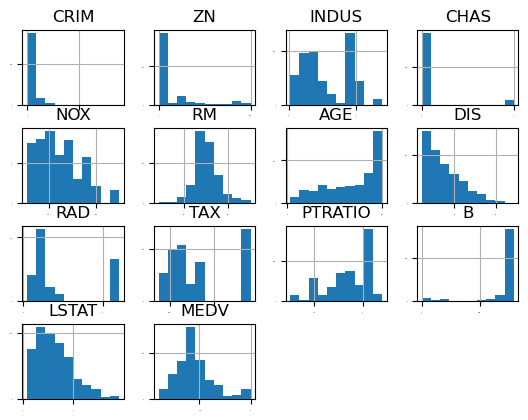

In [53]:
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

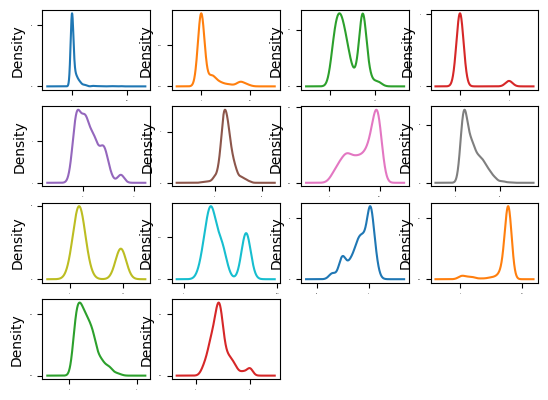

In [55]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1)
pyplot.show()
#It also looks like NOX, RM and LSTAT may be skewed 
#Gaussian distributions, which might be helpful later with transforms.

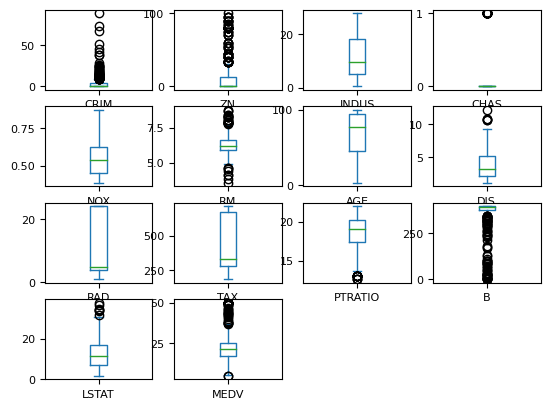

In [56]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8)
pyplot.show()
#This helps point out the skew in many distributions so much so that
#data looks like outliers (e.g. beyond the whisker of the plots).

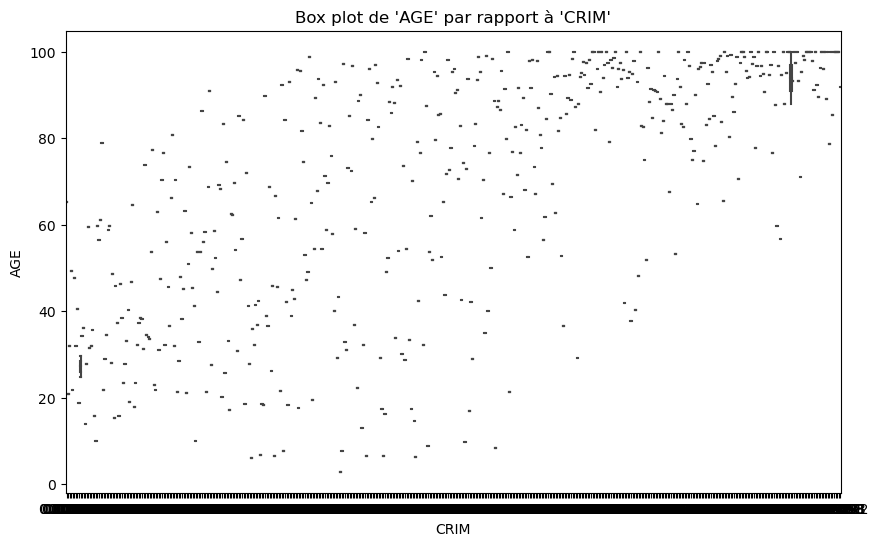

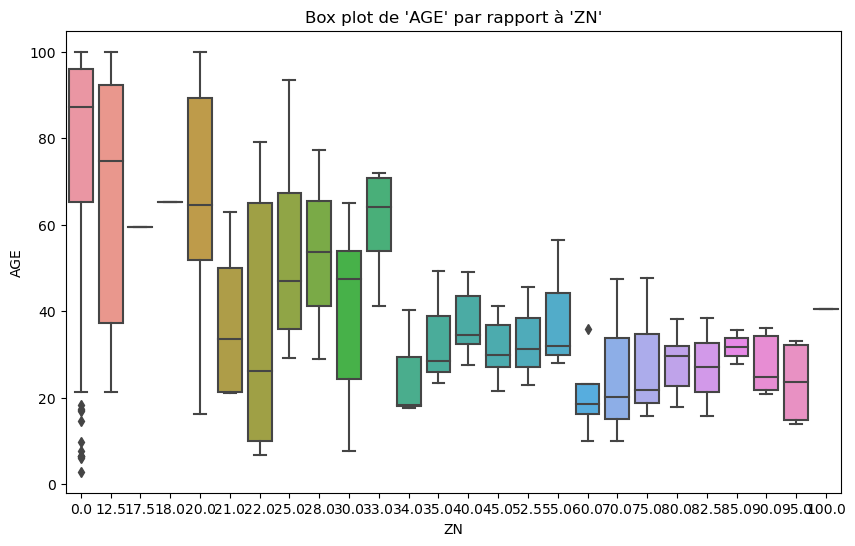

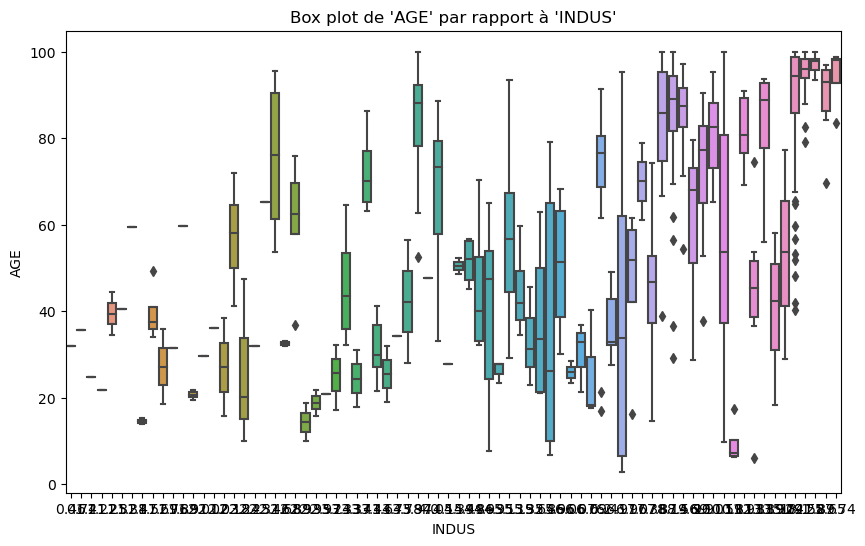

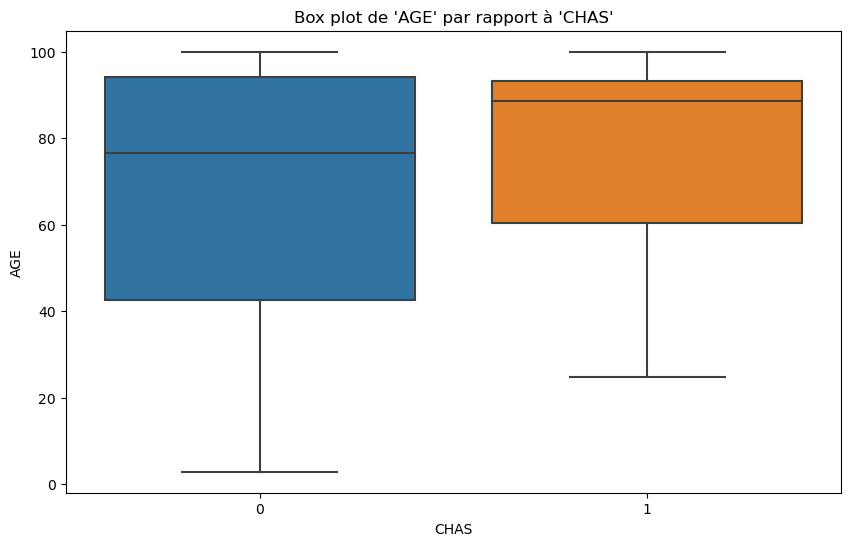

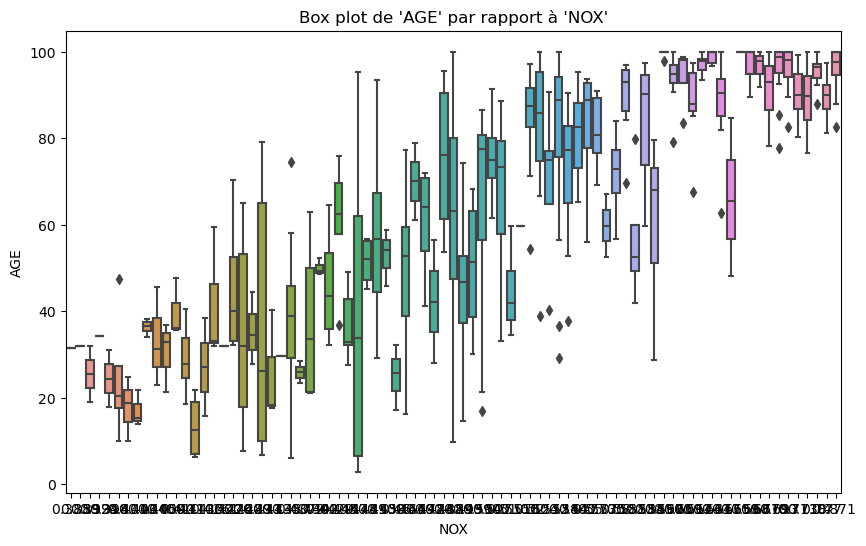

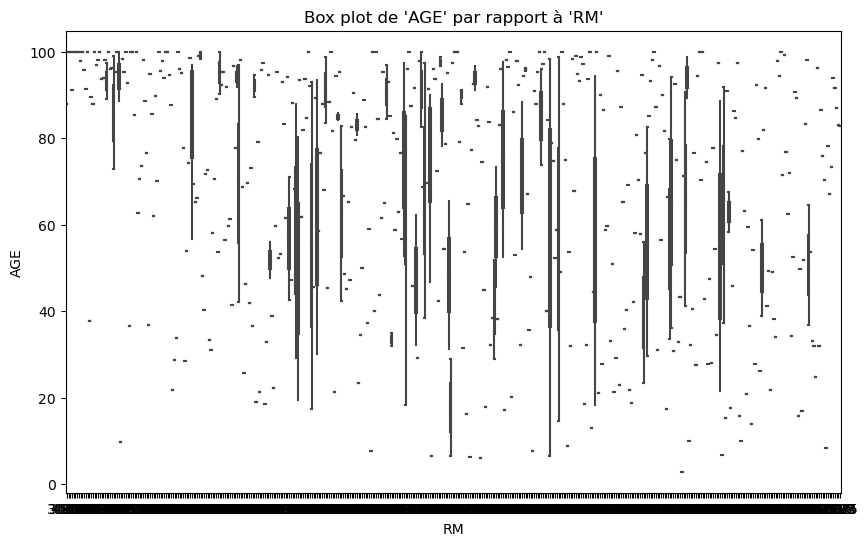

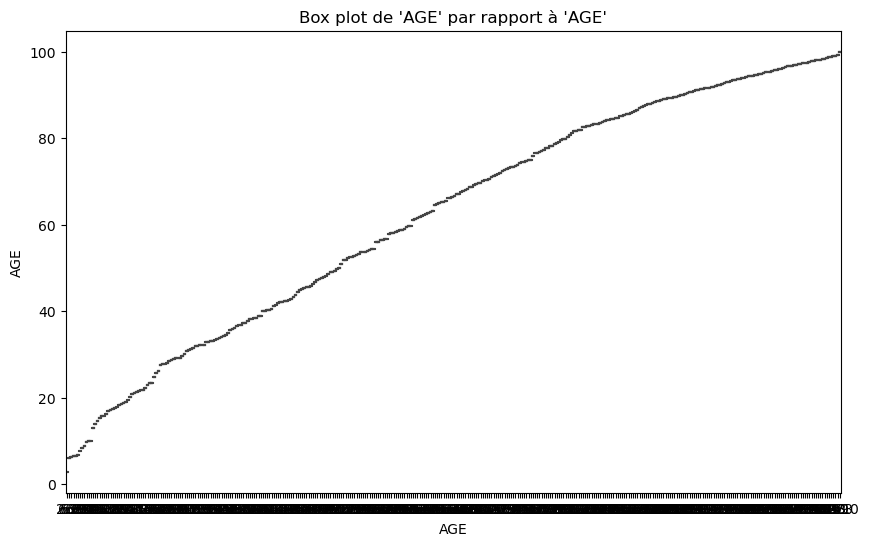

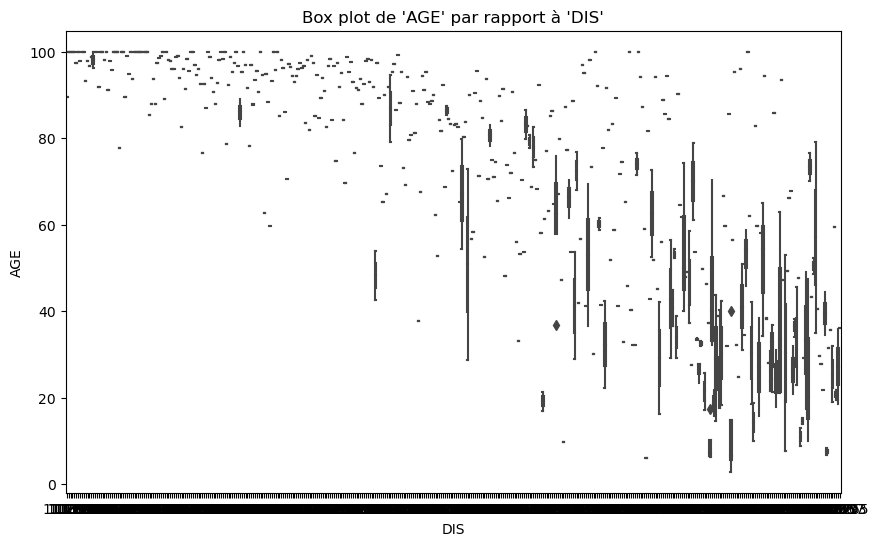

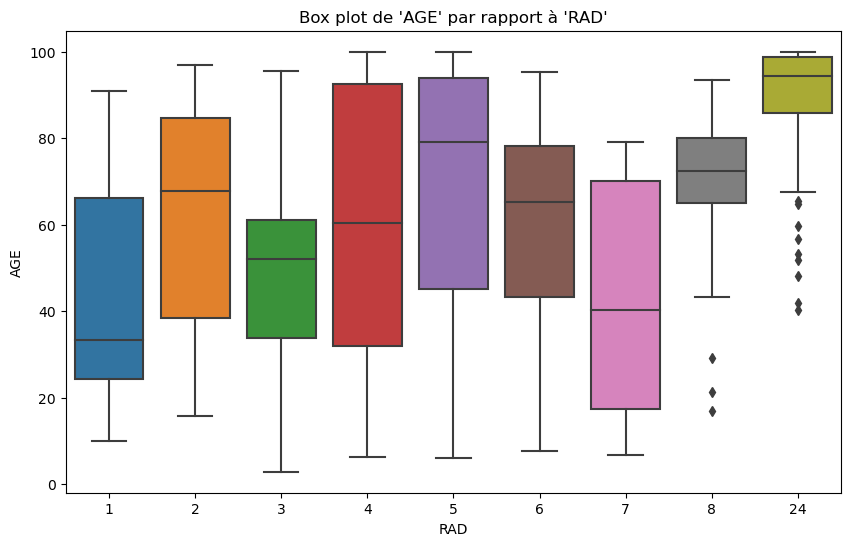

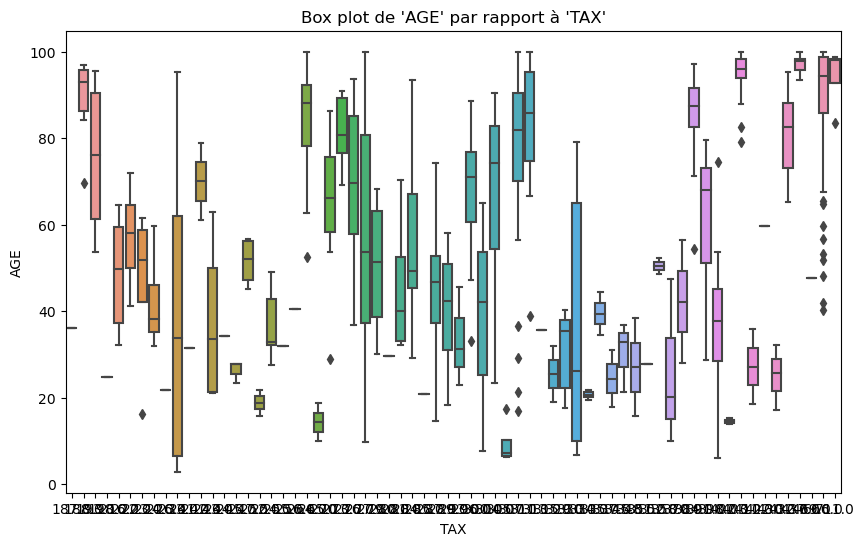

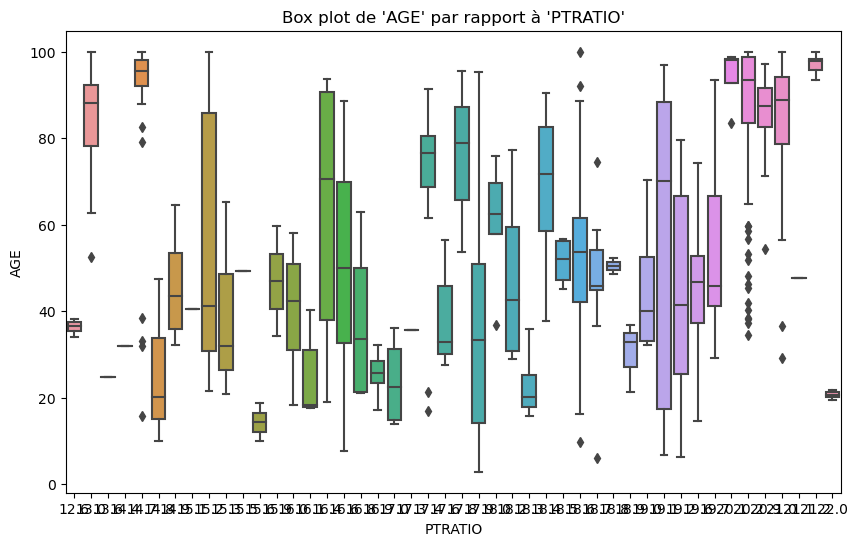

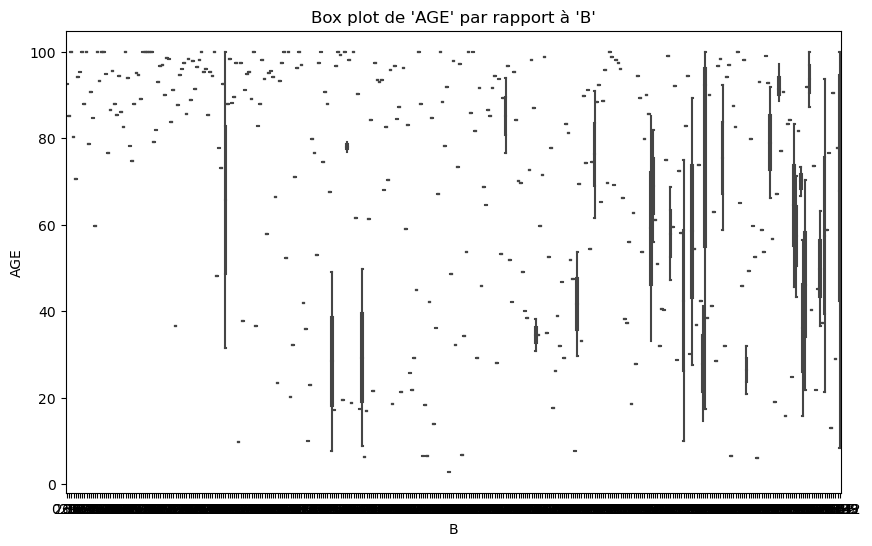

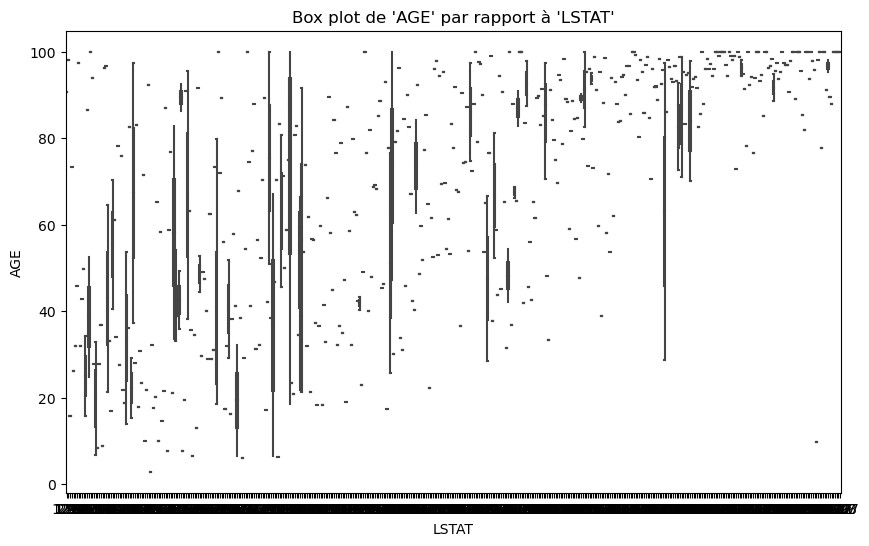

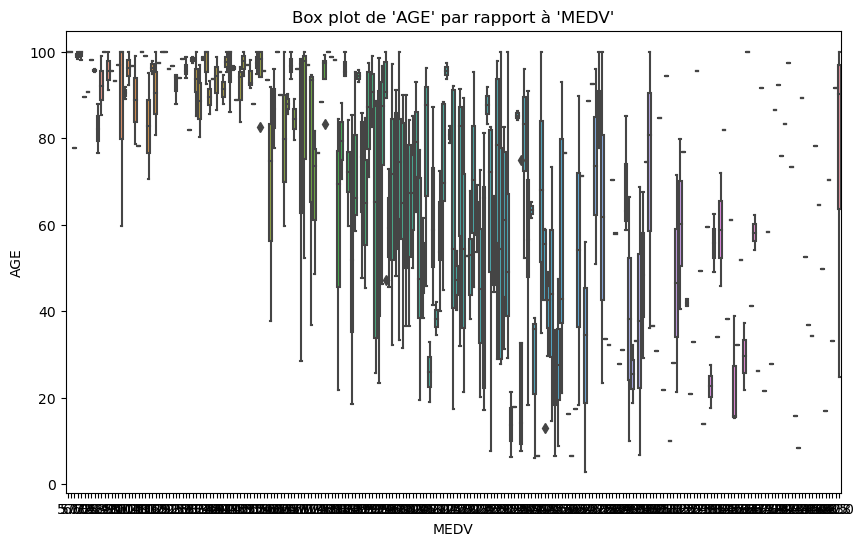

In [57]:
# Box plots des variables numériques par rapport aux variables catégoriques
for cat_col in df.columns:
    plt.figure(figsize=(10, 6))#(c'est-à-dire la largeur et la hauteur)
    sb.boxplot(x=cat_col, y='AGE', data=df)
    plt.title(f"Box plot de 'AGE' par rapport à '{cat_col}'")
    plt.show()

In [40]:
# correlation

print(df.corr(method='pearson'))

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

 We can see that many of the attributes have a strong correlation (e.g. > 0:70 or < -0:70). For example:

NOX and INDUS with 0.76.
DIS and INDUS with -0.71.
TAX and INDUS with 0.72.
AGE and NOX with 0.73.
DIS and NOX with -0.77.
It also looks like LSTAT has a good negative correlation with the output variable MEDV with a value of -0.74.

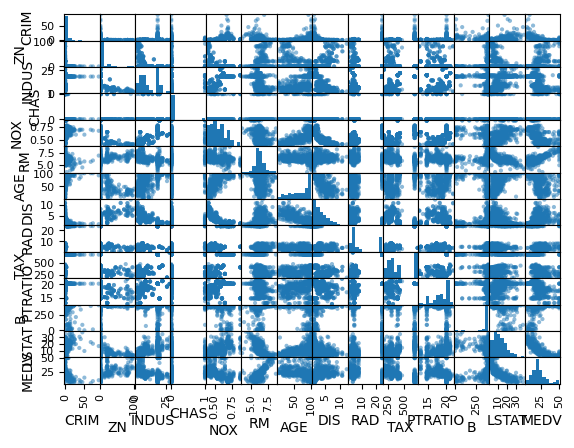

In [58]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()
#We can see that some of the higher correlated attributes do show good 
#structure in their relationship. Not linear, but nice predictable curved relationships.

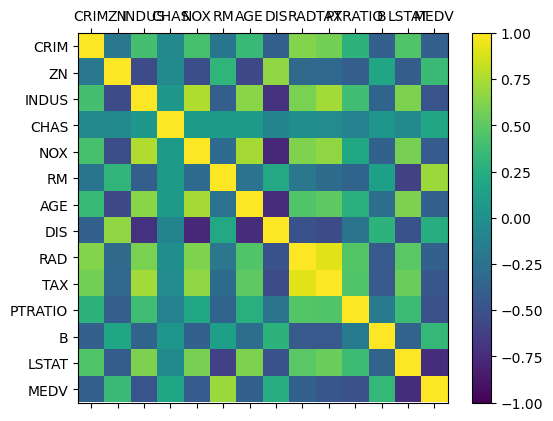

In [59]:
#Let's also visualize the correlations between the attributes
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

# The yellow color shows positive correlation whereas the purple color shows negative correlation.
We can also see some yellow and purple that suggest candidates for removal to better improve accuracy of models later on.

# 4.3 Summary of Ideas¶
There is a lot of structure in this dataset. We need to think about transforms that we could use later to better expose the structure which in turn may improve modeling accuracy. So far it would be worth trying:

Feature selection and removing the most correlated attributes.
Normalizing the dataset to reduce the effect of differing scales.
Standardizing the dataset to reduce the effects of differing distributions.
With lots of additional time we would also explore the possibility of binning (discretization) of the data. This can often improve accuracy for decision tree algorithms.

5. Validation Dataset
It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [60]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train,X_validation,Y_train,Y_validation=train_test_split(X,Y,test_size=validation_size,random_state=seed)

# 6. Evaluate Algorithms: Baseline¶
We have no idea what algorithms will do well on this problem. Gut feel suggests regression algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision trees and even SVM may do well. We have no idea. Let's design our test harness. We will use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [61]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# Let's create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. The six algorithms selected include:

Linear Algorithms: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).
Nonlinear Algorithms: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).

In [63]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('CART', DecisionTreeRegressor()),
 ('SVR', SVR())]

# The algorithms all use default tuning parameters. Let's compare the algorithms. We will display the mean and standard deviation of MSE for each algorithm as we calculate it and collect the results for use later.

In [65]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -27.122719 (11.694094)
SVR: -67.827886 (29.049138)


# It looks like LR (-21) has the lowest MSE, followed closely by CART (-25), LASSO (-26) and EN (-27).
Let's take a look at the distribution of scores across all cross validation folds by algorithm.

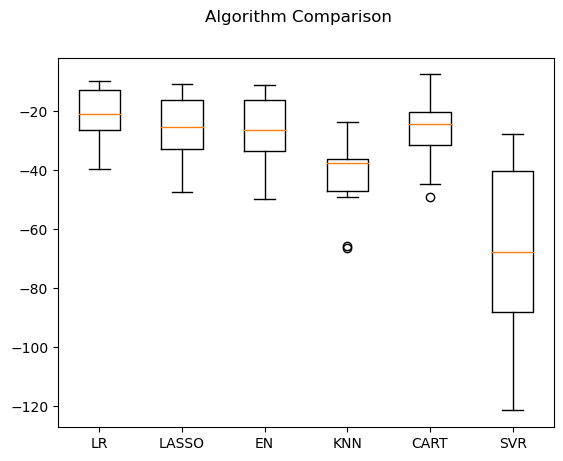

In [66]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# We can see similar distributions for the regression algorithms and perhaps a tighter distribution of scores for CART.

The differing scales of the data is probably hurting the skill of all of the algorithms and perhaps more so for SVR and KNN. In the next section we will look at running the same algorithms using a standardized copy of the data.

7. Evaluate Algorithms: Standardization
We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. Let's evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [68]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -23.703131 (13.257191)
ScaledSVR: -29.633086 (17.009186)


# Running the example provides a list of mean squared errors. We can see that scaling did have an effect on KNN, driving the error lower than the other models.
Let's take a look at the distribution of the scores across the cross validation folds.

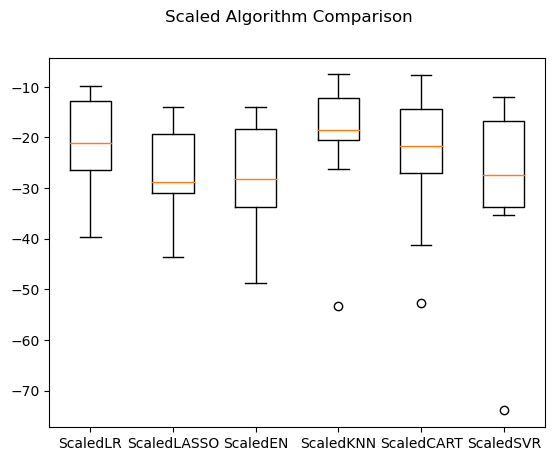

In [70]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


# We can see that KNN has both a tight distribution of error and has the lowest score.

# 8. Improve Results With Tuning¶
We know from the results in the previous section that KNN achieves good results on a scaled version of the dataset. But can it do better? The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset.

In [72]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# We can display the mean and standard deviation scores as well as the best performing value for k below.

In [73]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


# We can see that the best for k (n_neighbors) is 3 providing a mean squared error of -18.109304, the best so far.

9. Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM).
Bagging Methods: Random Forests (RF) and Extra Trees (ET). We will use the same test harness as before, 10-fold cross validation and pipelines that standardize the training data for each fold

In [75]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.555566 (6.628331)
ScaledGBM: -10.116193 (4.587661)
ScaledRF: -11.957852 (6.478698)
ScaledET: -9.193187 (5.386884)


# We can see that we're generally getting better scores than our linear and nonlinear algorithms in previous sections.

We can also plot the distribution of scores across the cross validation folds.

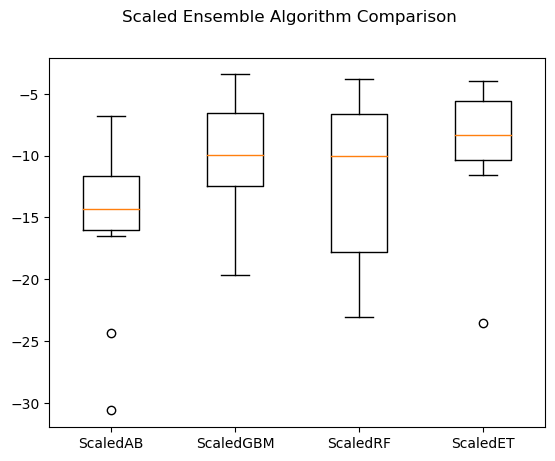

In [76]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# It looks like Gradient Boosting has a better mean score, it also looks like Extra Trees has a similar distribution and perhaps a better median score.

We can probably do better, given that the ensemble techniques used the default parameters. In the next section we will look at tuning the Gradient Boosting to further lift the performance.

10. Tune Ensemble Methods
The default number of boosting stages to perform (n_estimators) is 100. This is a good candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting stages, the better the performance but the longer the training time. In this section we will look at tuning the number of stages for gradient boosting. Below we define a parameter grid n_estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross validation.

In [78]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

# s before, we can summarize the best configuration and get an idea of how performance changed with each different configuration.

In [79]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -9.265494 using {'n_estimators': 300}
-10.793331 (4.835961) with: {'n_estimators': 50}
-10.158450 (4.543628) with: {'n_estimators': 100}
-9.719646 (4.265059) with: {'n_estimators': 150}
-9.761290 (4.349165) with: {'n_estimators': 200}
-9.427416 (4.306769) with: {'n_estimators': 250}
-9.265494 (4.198758) with: {'n_estimators': 300}
-9.607820 (4.448726) with: {'n_estimators': 350}
-9.465871 (4.423826) with: {'n_estimators': 400}


# We can see that the best configuration was n_estimators=400 resulting in a mean squared error of -9.356471, about 0.65 units better than the untuned method.

Next we can finalize the model and prepare it for general use.

11. Finalize Model
In this section we will finalize the gradient boosting model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.

In [80]:
#prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [81]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.902132586880027


# We can see that the estimated mean squared error is 11.8, close to our estimate of -9.3.

# 12. Summary¶
We performed the following steps:

Loading the Dataset.

Analyze Data (some skewed distributions and correlated attributes).

Evaluate Algorithms (Linear Regression looked good).

Evaluate Algorithms with Standardization (KNN looked good).

Algorithm Tuning (K=3 for KNN was best).

Ensemble Methods (Bagging and Boosting, Gradient Boosting looked good).

Tuning Ensemble Methods (getting the most from Gradient Boosting).

Finalize Model (use all training data and confirm using validation dataset).